In [2]:
from PIL import Image, ImageOps
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
import glob, os
import math
from scipy import spatial
import random 

In [3]:
def load_images(source:str) -> np.ndarray:
    with Image.open(source) as im:
        im_arr = np.asarray(im)
    return im_arr

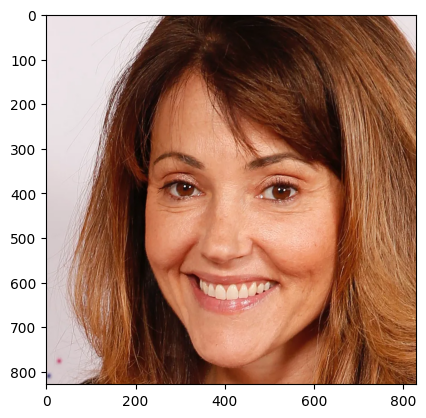

In [4]:
face_im_arr = load_images('images/SampleImage.webp')
plt.imshow(Image.fromarray(face_im_arr))


In [5]:
width = face_im_arr.shape[0]
height = face_im_arr.shape[1]

target_res = (20, 20) #number of rows and column

In [6]:
face_im_arr.shape

(828, 828, 3)

In [7]:
mos_template = face_im_arr[::(height//target_res[0]),::(height//target_res[1])]

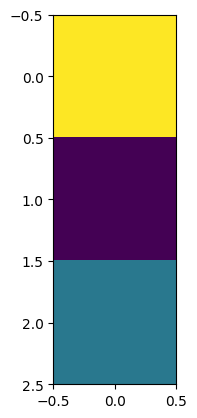

In [10]:
plt.imshow(Image.fromarray(mos_template[0,0]))

In [13]:
plt.imshow(Image.fromarray(mos_template[::0, ::0]))

ValueError: slice step cannot be zero

In [14]:
mos_template[:,:, -1].size

441

In [15]:
images = []

for file in glob.glob('Mosaic-Images/*'):
    im = load_images(file)
    images.append(im)

In [16]:
images = [i for i in images if i.ndim==3]

In [17]:
def resize_image(img : Image, size : tuple) -> np.ndarray:
    resz_img = ImageOps.fit(img, size, Image.LANCZOS, centering=(0.5, 0.5))
    return np.array(resz_img)

In [18]:
mosaic_size = (40, 40) ## Defines size of each mosiac image
images = [resize_image(Image.fromarray(i), mosaic_size) for i in images]

In [19]:
len(images)

1000

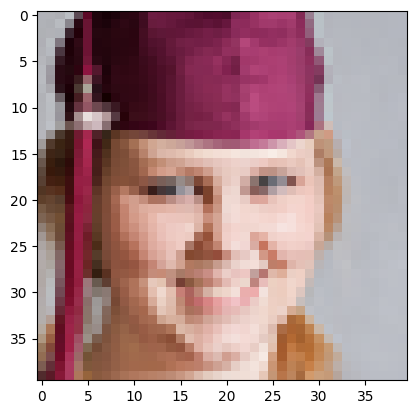

In [20]:
plt.imshow(Image.fromarray(images[60]))

In [21]:
images_array = np.asarray(images)
images_array.shape

(1000, 40, 40, 3)

In [22]:
image_values = np.apply_over_axes(np.mean, images_array, [1,2]).reshape(len(images),3)
image_values

array([[173.3     , 147.824375, 119.359375],
       [130.221875, 108.4325  , 109.041875],
       [109.06    ,  80.02625 ,  60.288125],
       ...,
       [107.763125,  88.0825  ,  85.7975  ],
       [140.4475  , 115.854375, 110.70625 ],
       [134.90625 , 114.01875 , 113.88625 ]])

In [23]:
tree = spatial.KDTree(image_values)

In [24]:
image_idx = np.zeros(target_res, dtype=np.uint32)


for i in range(target_res[0]):
    for j in range(target_res[1]):
        
        template = mos_template[i, j]
        
        match = tree.query(template, k=40)
        pick = random.randint(0, 39)
        image_idx[i, j] = match[1][pick]

In [ ]:
canvas = Image.new('RGB', (mosaic_size[0]*target_res[0], mosaic_size[1]*target_res[1]))

for i in range(target_res[0]):
    for j in range(target_res[1]):
        arr = images[image_idx[j, i]]
        x, y = i*mosaic_size[0], j*mosaic_size[1]
        im = Image.fromarray(arr)
        canvas.paste(im, (x,y))
        
canvas

In [25]:
canvas = Image.new('RGB', (mosaic_size[0]*target_res[0], mosaic_size[1]*target_res[1]))

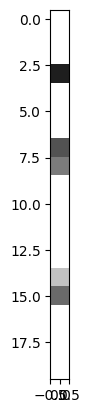

In [33]:
plt.imshow(Image.fromarray(image_idx[19]))

In [ ]:
!pip3 install BeautifulSoup4

In [ ]:
import os
import json 
import requests 
from bs4 import BeautifulSoup 

In [ ]:
import os
import json 
import requests 
from bs4 import BeautifulSoup 

GOOGLE_IMAGE = \
    'https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&'

# The User-Agent request header contains a characteristic string 
# that allows the network protocol peers to identify the application type, 
# operating system, and software version of the requesting software user agent.
# needed for google search
usr_agent = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive',
}

i=0
SAVE_FOLDER = 'OtherImages'
filename_tosave = "box"
dir = SAVE_FOLDER+'/'


# def main():
#     if not os.path.exists(SAVE_FOLDER):
#         print("Making Directory")
#         os.mkdir(SAVE_FOLDER)
#     print("Directory exists")
#     download_images()
    
def download_images(keyword):
    
    searchurl = GOOGLE_IMAGE + 'q=' + keyword
    print(searchurl)

    # request url, without usr_agent the permission gets denied
    response = requests.get(searchurl, headers=usr_agent)
    html = response.text
    
    #Parsing HTML
    soup = BeautifulSoup(html, 'html.parser')
    
    #Retrieveing number of files present in the folder
    global i
    imagelinks= []
    list = os.listdir(dir) # dir is your directory path
    i = len(list)
    print(i)
    
    #Search for Class "img" and eventually obtain links in "data-src" 
    for link in soup.findAll('img'):
        op = link.get('data-src')
        if not op:
            continue
        else:
            response = requests.get(op)
            imagename = SAVE_FOLDER + '/' + filename_tosave + str(i+1) + '.jpg'
            with open(imagename, 'wb') as file:
                file.write(response.content)
            i = i +1
            print("IMAGE LINKS:", link.get('data-src'))

    print('Done Downloading')

In [ ]:
download_images('food')

In [ ]:
tile_images = [load_images(file) for file in glob.glob('Mosaic_Images'+'/*')]


In [ ]:
tile_images = []

for file in glob.glob('Mosaic-Images'+'/*'):
    im = load_images(file)
    tile_images.append(im)

In [ ]:
len(tile_images)

In [ ]:
tile_images = [i for i in tile_images if i.ndim==3]
tile_images = [resize_image(Image.fromarray(i), (40,40)) for i in tile_images]
tile_images_array = np.asarray(tile_images)
tile_images_values = np.apply_over_axes(np.mean, tile_images_array, [1,2]).reshape(len(tile_images),3)

In [6]:
from photomosaic import Photomosaic


result = Photomosaic('Mosaic-Images', 'images/SampleImage.webp','output', mosaic_size=100, divisions=40)
result.process()

Main Image process completed: 828 by 828
tile_images_path:  Mosaic-Images/*
1000
Tile Image process completed: 1000 tile images
Matching tiles to sliding windows: 1000 tile images
